**Football Match Probability Prediction**

In [1]:
import numpy as np
import pandas as pd
import warnings
import time
warnings.simplefilter('ignore')
import math
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
submit = True
search = False
estimators = 20
from datetime import timedelta
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

In [2]:
train = pd.read_csv('../input/football-match-probability-prediction/train.csv')
X_test = pd.read_csv('../input/football-match-probability-prediction/test.csv')
train_target_score = pd.read_csv('../input/football-match-probability-prediction/train_target_and_scores.csv')

In [3]:
train.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [4]:
train.isna().sum()

id                                    0
target                                0
home_team_name                        1
away_team_name                        1
match_date                            0
                                  ...  
away_team_history_league_id_6      8426
away_team_history_league_id_7      9867
away_team_history_league_id_8     11295
away_team_history_league_id_9     12762
away_team_history_league_id_10    14216
Length: 190, dtype: int64

In [5]:
train.describe()

,id,league_id,home_team_coach_id,away_team_coach_id,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
count,1.109380e+05,110938.000000,8.921700e+04,8.912300e+04,109779.000000,108487.000000,107165.000000,105837.000000,104461.000000,103042.000000,...,109712.000000,108345.000000,106904.000000,105422.000000,103938.000000,102512.000000,101071.000000,99643.000000,98176.000000,96722.000000
mean,1.519875e+07,910.457012,1.287134e+07,1.291552e+07,0.306944,0.567801,0.466141,0.519469,0.487857,0.507288,...,901.986200,894.389137,886.368012,878.243611,869.450297,861.901455,853.435338,844.673223,837.678200,829.177374
std,2.536393e+06,549.120985,1.578479e+07,1.580344e+07,0.461228,0.495384,0.498855,0.499623,0.499855,0.499949,...,545.826707,542.247411,538.497274,534.864981,531.170701,527.338931,524.217968,520.954647,517.647869,514.900676
min,1.142829e+07,2.000000,2.000000e+00,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.200038e+07,444.000000,4.596120e+05,4.595650e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,438.000000,432.000000,426.000000,420.000000,417.000000,408.000000,399.000000,391.500000,387.000000,387.000000
50%,1.675988e+07,947.000000,1.552728e+06,1.552806e+06,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,944.000000,935.000000,906.500000,899.000000,884.000000,881.000000,860.000000,830.000000,821.000000,806.000000
75%,1.724230e+07,1293.000000,3.243116e+07,3.279539e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1286.000000,1283.000000,1279.000000,1274.000000,1270.000000,1267.000000,1265.000000,1263.000000,1261.000000,1255.000000
max,1.805384e+07,2039.000000,3.756849e+07,3.756847e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2028.000000,2025.000000


['home_team_history_coach_1', 'home_team_history_coach_2', 'home_team_history_coach_3', 'home_team_history_coach_4', 'home_team_history_coach_5', 'home_team_history_coach_6', 'home_team_history_coach_7', 'home_team_history_coach_8', 'home_team_history_coach_9', 'home_team_history_coach_10']


<AxesSubplot:>

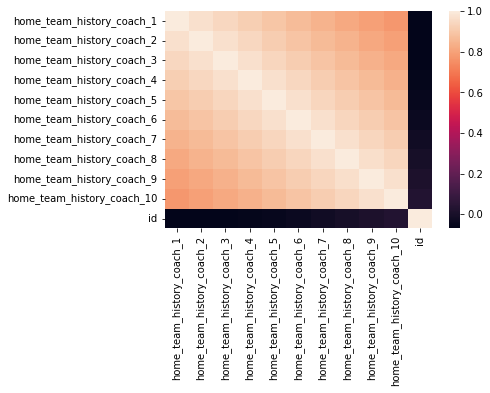

In [6]:
target_columns = 'home_team_history_coach'
###
cols = []
for col in train.filter(regex=target_columns, axis=1).columns:
    cols.append(col)
print(cols)
corr = pd.concat([train[cols],train_target_score], axis=1).corr()
sns.heatmap(corr)

['away_team_history_coach_1', 'away_team_history_coach_2', 'away_team_history_coach_3', 'away_team_history_coach_4', 'away_team_history_coach_5', 'away_team_history_coach_6', 'away_team_history_coach_7', 'away_team_history_coach_8', 'away_team_history_coach_9', 'away_team_history_coach_10']


<AxesSubplot:>

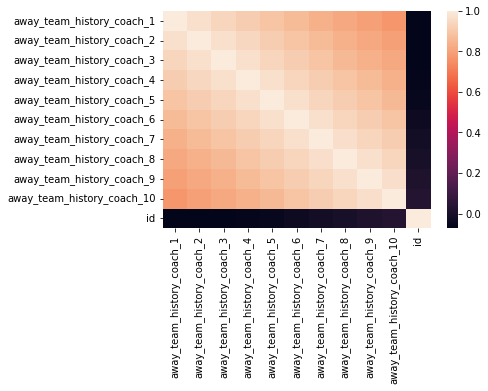

In [7]:
target_columns = 'away_team_history_coach'
###
cols = []
for col in train.filter(regex=target_columns, axis=1).columns:
    cols.append(col)
print(cols)
corr = pd.concat([train[cols],train_target_score], axis=1).corr()
sns.heatmap(corr)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110938 entries, 0 to 110937
Columns: 190 entries, id to away_team_history_league_id_10
dtypes: float64(162), int64(2), object(26)
memory usage: 160.8+ MB


In [9]:
def add_streak(train):
    h_t_goal = "home_team_history_goal_"
    h_t_opp_goal = "home_team_history_opponent_goal_"
    a_t_goal = "away_team_history_goal_"
    a_t_opp_goal = "away_team_history_opponent_goal_"
    train["away_streak"] = np.nan
    train["home_streak"] = np.nan
    def apply_streaks(x):
        home_streak = 0
        away_streak = 0
        home_streak_over = False
        away_streak_over = False
        
        if  x[h_t_goal+str(1)] > x[h_t_opp_goal+str(1)]:
            home_win_streak = True
        else:
            home_win_streak = False
            
        if  x[a_t_goal+str(1)] > x[a_t_opp_goal+str(1)]:
            away_win_streak = True
        else:
            away_win_streak = False
            
        def check_streak(streak,streak_over,win_streak,team_goal,opp_goal):
            if not streak_over and win_streak and team_goal > opp_goal:
                streak+=1
            elif not streak_over and not win_streak and team_goal < opp_goal:
                streak-=1
            elif not streak_over and team_goal == opp_goal:
                pass
            else:
                streak_over = True
            return streak, streak_over
                
        for i in range(1,11):
            if not home_streak_over:
                home_streak, home_streak_over = check_streak(home_streak,home_streak_over, home_win_streak, x[h_t_goal+str(i)],x[h_t_opp_goal+str(i)])
            if not away_streak_over:
                away_streak, away_streak_over = check_streak(away_streak,away_streak_over, away_win_streak, x[a_t_goal+str(i)],x[a_t_opp_goal+str(i)])
            
        return pd.Series([home_streak,away_streak],index=['home_streak','away_streak'])

    
    train[['home_streak','away_streak']] = train.apply(lambda x: apply_streaks(x), axis=1)
    return train

In [10]:
import category_encoders as ce
from sklearn.model_selection import train_test_split


X_train = train.drop(['target'], axis=1)
y_train = train['target']

X_train = add_streak(X_train)
X_test = add_streak(X_test)

if not submit:
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

encoder = ce.OrdinalEncoder(cols=['home_team_name' , 'away_team_name', 'is_cup'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
temp_df = X_test
for i in X_train.columns:
    if X_train[i].dtype == 'object':
        X_train = X_train.drop([i],axis=1)
        X_test = X_test.drop([i],axis=1)
    if "is_cup" in i or "history_is_play_home" in i:
        try:
            X_train = X_train.drop([i],axis=1)
            X_test = X_test.drop([i],axis=1)
        except:
            continue

for i in X_train.columns:
    if 'rating' not in i and 'goal':
        X_train[i] = X_train[i].fillna(-1)
        X_test[i] = X_test[i].fillna(-1)
    else:
        X_train[i] = X_train[i].fillna(X_train[i].mode())
        X_test[i] = X_test[i].fillna(X_train[i].mode())
lag_size = 9




In [11]:
for i in X_train.columns:
    print(i)

id
home_team_name
away_team_name
league_id
home_team_coach_id
away_team_coach_id
home_team_history_goal_1
home_team_history_goal_2
home_team_history_goal_3
home_team_history_goal_4
home_team_history_goal_5
home_team_history_goal_6
home_team_history_goal_7
home_team_history_goal_8
home_team_history_goal_9
home_team_history_goal_10
home_team_history_opponent_goal_1
home_team_history_opponent_goal_2
home_team_history_opponent_goal_3
home_team_history_opponent_goal_4
home_team_history_opponent_goal_5
home_team_history_opponent_goal_6
home_team_history_opponent_goal_7
home_team_history_opponent_goal_8
home_team_history_opponent_goal_9
home_team_history_opponent_goal_10
home_team_history_rating_1
home_team_history_rating_2
home_team_history_rating_3
home_team_history_rating_4
home_team_history_rating_5
home_team_history_rating_6
home_team_history_rating_7
home_team_history_rating_8
home_team_history_rating_9
home_team_history_rating_10
home_team_history_opponent_rating_1
home_team_history_op

In [12]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss,accuracy_score
if not search:
    best_hyperparams = {'colsample_bytree': 0.9080289013373745, 'gamma': 1.2419885617337658, 'max_depth': 8.0, 'min_child_weight': 4.0, 'n_estimators': 238.0, 'reg_alpha': 41.0, 'reg_lambda': 0.05050398016408508}
if not submit and not search:
    rfc = XGBClassifier(n_estimators=int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                    reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                    colsample_bytree=int(best_hyperparams['colsample_bytree']))
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict_proba(X_test)
    y_pred_acc = rfc.predict(X_test)

    print(y_test.values)
    print(y_pred)
    print('Log loss score with  : {0:0.4f}'. format(log_loss(y_test.values,y_pred)))
    print('Model accuracy score with : {0:0.4f}'. format(accuracy_score(y_test, y_pred_acc)))

In [13]:
if not submit and not search:
    feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

    for i,v in feature_scores.items():
        print(i, v)

In [14]:
from hyperopt import hp
import xgboost as xgb
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

if search:

    space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
            'gamma': hp.uniform ('gamma', 1,9),
            'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
            'reg_lambda' : hp.uniform('reg_lambda', 0,1),
            'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
            'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
            'n_estimators': hp.quniform('n_estimators', 150, 250, 1),
            'seed': 0
        }

    def objective(space):
        clf=xgb.XGBClassifier(
                        n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']))

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="mlogloss",
                early_stopping_rounds=100,verbose=False)


        y_pred = clf.predict_proba(X_test)
        accuracy = log_loss(y_test.values,y_pred)
        print ("SCORE:", accuracy)
        return {'loss': accuracy, 'status': STATUS_OK }

    trials = Trials()

    best_hyperparams = fmin(fn = objective,
                            space = space,
                            algo = tpe.suggest,
                            max_evals = 100,
                            trials = trials)


In [15]:
    print(best_hyperparams)

{'colsample_bytree': 0.9080289013373745, 'gamma': 1.2419885617337658, 'max_depth': 8.0, 'min_child_weight': 4.0, 'n_estimators': 238.0, 'reg_alpha': 41.0, 'reg_lambda': 0.05050398016408508}


In [16]:
from sklearn.pipeline import Pipeline
if submit:
    pipeline = Pipeline(steps=[
        ("classifier", XGBClassifier(n_estimators=int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                    reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                    colsample_bytree=int(best_hyperparams['colsample_bytree'])))])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict_proba(X_test)
    submission = pd.DataFrame(predictions ,columns=pipeline.classes_)

    #do not forget the id column
    submission['id'] = temp_df['id']
    display(submission)
    #submit!
    submission.to_csv('submission.csv', index=False)

[22:33:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,away,draw,home,id
0,0.253839,0.288841,0.457320,17761448
1,0.357819,0.309941,0.332240,17695487
2,0.302480,0.328623,0.368897,17715496
3,0.563865,0.267515,0.168620,17715493
4,0.208680,0.289077,0.502242,17715492
...,...,...,...,...
72706,0.270478,0.320907,0.408615,18450246
72707,0.191743,0.285334,0.522923,18164889
72708,0.486099,0.232022,0.281878,18449018
72709,0.188546,0.272457,0.538997,17958831
